In this notebook, the task is to prepare the indepdent variables measuring individual attitude toward recycling and waste reduction.
The data source is the Eurobarometer surveys on the attitude of Europeans toward the environment.
The surveys are not conducted every year, so the available years are 2004, 2008, 2011, 2014, 2017, 2019, 2024.

Variables of interest: Personal attitude or norms toward regarding environmental protection. 
I identified the following questions that are relevant:
1) What do you do, have done, believe others should do to protect the environment?
2) How important is protecting the environment to you personally?

*note: the question formulations may vary slightly across years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

Prepare the variables INDrec and INDred. 
These measure how widespread, as percentage of respondents, the personal norms are that individuals should recycle or reduce waste, among others, to protect the environment.
The question in the survey allows for multiple answers, so we need to only extract the ones that are relevant for recycling or source reduction. 
For such a task, we need to use regular expression.

In [3]:
file_path = 'attitude_action.xlsx'
#load all sheet names
sheet_names = pd.ExcelFile(file_path).sheet_names

# Regex pattern for recycling-related keywords to extract questions related to recycling
pattern_rec = re.compile(r"\brecycling\b|\brecycle\b|\brecycled\b", flags=re.IGNORECASE)

INDrec = pd.DataFrame()

for sheet in sheet_names:

    df = pd.read_excel(file_path, sheet_name=sheet)

    #name first column 'question'
    df.rename(columns={df.columns[0]: 'question'}, inplace=True)

    #filter rows where the first column contains recycling-related keywords
    df_recycle = df[df['question'].str.contains(pattern_rec, na=False)]

    #melt from wide to long format
    df_recycle = pd.melt(df_recycle,
                         id_vars=['question'],
                         var_name='country',
                         value_name='INDrec')

    #add year from sheet name as a column
    df_recycle['year'] = int(sheet)


    #append to INDbeh
    INDrec = pd.concat([INDrec, df_recycle])

#get the unique values from column 'question'
questions = INDrec['question'].unique()

print(questions)

['Sort waste so that it can be recycled '
 'Separated most of your waste for recycling'
 'Correctly sort my waste for recycling'
 'Primarily buy products in recycled packages']


In [4]:
# filter out the question 'Primarily buy products in recycled packages'

INDrec = INDrec[INDrec['question'] != 'Primarily buy products in recycled packages']

In [5]:
# Regex pattern for reduce-related keywords 'over packaged', 'over-packaged', 'more packaging than necessary'

pattern_red = re.compile(r"\b(over packaged|over-packaged|more packaging than necessary)\b", flags=re.IGNORECASE)

INDred = pd.DataFrame()

for sheet in sheet_names:

    df = pd.read_excel(file_path, sheet_name=sheet)

    #name first column 'question'
    df.rename(columns={df.columns[0]: 'question'}, inplace=True)

    #filter rows where the first column contains reduce-related keywords
    df_reduce = df[df['question'].str.contains(pattern_red, na=False)]

    #melt from wide to long format
    df_reduce = pd.melt(df_reduce,
                         id_vars=['question'],
                         var_name='country',
                         value_name='INDred')

    #add year from sheet name as a column
    df_reduce['year'] = int(sheet)

   #append to INDbeh
    INDred = pd.concat([INDred, df_reduce])

INDred.head()

#inspect the questions extracted

questions = INDred['question'].unique()

print(questions)

C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]
C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]
C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]
C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extrac

['Reduce waste by buying bigger sizes, concentrated products, second hand items or avoid buying over packaged products, etc.'
 'Reduce waste by, for example, buying bigger sizes, concentrated products, second hand items or avoid buying over-packaged products, etc. '
 'Reduce waste by buying more selectively and avoiding over-packaged products '
 'Reduce waste e.g. by avoiding over-packaged products and buying products with a longer life '
 'Avoided buying over-packaged products'
 'Primarily buy products that do not have more packaging than necessary']


C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]
C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]
C:\Users\lzho\AppData\Local\Temp\ipykernel_10664\798373516.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_reduce = df[df['question'].str.contains(pattern_red, na=False)]


In [6]:
# merge the dataframe into one on country and year

INDbeh = pd.merge(INDrec, INDred, on=['country', 'year'])

#inspect data for e.g. Austria and Germany

INDbeh[INDbeh['country'].isin(['AT', 'DE'])].sort_values(by=['country', 'year'])

,question_x,country,INDrec,year,question_y,INDred
13,Sort waste so that it can be recycled,AT,0.68,2004,"Reduce waste by buying bigger sizes, concentra...",0.43
49,Sort waste so that it can be recycled,AT,0.5,2008,"Reduce waste by, for example, buying bigger si...",0.44
79,Sort waste so that it can be recycled,AT,0.57,2011,Reduce waste by buying more selectively and av...,0.41
110,Sort waste so that it can be recycled,AT,0.47,2014,Reduce waste e.g. by avoiding over-packaged pr...,0.3
141,Separated most of your waste for recycling,AT,0.49,2017,Avoided buying over-packaged products,0.39
173,Separated most of your waste for recycling,AT,0.46,2019,Avoided buying over-packaged products,0.43
204,Correctly sort my waste for recycling,AT,0.63,2024,Primarily buy products that do not have more p...,0.62
4,Sort waste so that it can be recycled,DE,0.75,2004,"Reduce waste by buying bigger sizes, concentra...",0.4
34,Sort waste so that it can be recycled,DE,0.46,2008,"Reduce waste by, for example, buying bigger si...",0.36
64,Sort waste so that it can be recycled,DE,0.5,2011,Reduce waste by buying more selectively and av...,0.4


In [7]:
# map the country code to full country names

country_map = {
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "D-W": "Germany_West",
    "DE": "Germany",
    "D-E": "Germany_East",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
}

INDbeh['country'] = INDbeh['country'].map(country_map)


In [8]:
#filter out rows where the country name is NaN, as this is EU totals labeled as EU25, EU27 depending on year
INDbeh = INDbeh[INDbeh['country'].notna()]

#filter out 'Germany_West' and 'Germany_East'
INDbeh = INDbeh[~INDbeh['country'].isin(['Germany_West', 'Germany_East'])]

#select columns country, year, INDrec, INDred
INDbeh = INDbeh[['country', 'year', 'INDrec', 'INDred']]

#filter out Germany_West and Germany_East
INDbeh = INDbeh[~INDbeh['country'].isin(['Germany_West', 'Germany_East'])]

INDbeh.head(10)

,country,year,INDrec,INDred
1,Belgium,2004,0.76,0.34
2,Denmark,2004,0.7,0.23
4,Germany,2004,0.75,0.4
6,Greece,2004,0.68,0.31
7,Spain,2004,0.65,0.27
8,France,2004,0.79,0.29
9,Ireland,2004,0.8,0.34
10,Italy,2004,0.61,0.29
11,Luxembourg,2004,0.82,0.29
12,Netherlands,2004,0.71,0.24


Prepare the variable INDimp. 
It measures how widespread, as percentage of respondents, the personal norm is that protecting the environment is important.

In [9]:
file_path = 'attitude_importance.xlsx'

#load the sheet names for a for loop
sheet_names = pd.ExcelFile(file_path).sheet_names

INDimp = pd.DataFrame()

for sheet in sheet_names:

    df = pd.read_excel(file_path, sheet_name=sheet)

    #name the first column 'scale'
    df.rename(columns={df.columns[0]: 'scale'}, inplace=True)

    #melt from wide to long format
    df = pd.melt(df,
                 id_vars=['scale'],
                 var_name='country',
                 value_name='INDimp')

    #add year from sheet name as a column
    df['year'] = int(sheet)

    INDimp = pd.concat([INDimp, df])

INDimp.head(20)

,scale,country,INDimp,year
0,TOTAL,UE25\nEU25,24786.0,2004
1,Beaucoup,UE25\nEU25,6111.0,2004
2,Very much,UE25\nEU25,0.25,2004
3,Assez,UE25\nEU25,11622.0,2004
4,Quite a lot,UE25\nEU25,0.47,2004
5,Pas tellement,UE25\nEU25,5555.0,2004
6,Not much,UE25\nEU25,0.22,2004
7,Pas du tout,UE25\nEU25,999.0,2004
8,Not at all,UE25\nEU25,0.04,2004
9,NSP,UE25\nEU25,499.0,2004


In [10]:
# map the country code to full country names

country_map = {
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "D-W": "Germany_West",
    "DE": "Germany",
    "D-E": "Germany_East",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
}

INDimp['country'] = INDimp['country'].map(country_map)

In [11]:
print(INDimp['country'].unique())

[nan 'Belgium' 'Denmark' 'Germany_West' 'Germany' 'Germany_East' 'Greece'
 'Spain' 'France' 'Ireland' 'Italy' 'Luxembourg' 'Netherlands' 'Austria'
 'Portugal' 'Finland' 'Sweden' 'Cyprus' 'Czechia' 'Estonia' 'Hungary'
 'Latvia' 'Lithuania' 'Malta' 'Poland' 'Slovakia' 'Slovenia' 'Bulgaria'
 'Romania' 'Croatia']


In [12]:
INDimp.info()# print the unique values in column country


<class 'pandas.core.frame.DataFrame'>
Index: 3240 entries, 0 to 509
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   scale    3180 non-null   object
 1   country  2535 non-null   object
 2   INDimp   3210 non-null   object
 3   year     3240 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 126.6+ KB


In [13]:
#select only rows where the country column is not NaN

INDimp = INDimp[INDimp['country'].notna()]

#filter out 'Germany_West' and 'Germany_East'
INDimp = INDimp[~INDimp['country'].isin(['Germany_West', 'Germany_East'])]

#select columns country, year, INDrec, INDred
INDimp = INDimp[['country', 'year', 'scale', 'INDimp']]


#filter out Germany_West and Germany_East
INDimp = INDimp[~INDimp['country'].isin(['Germany_West', 'Germany_East'])]

INDimp.head(5)

,country,year,scale,INDimp
15,Belgium,2004,TOTAL,1000.0
16,Belgium,2004,Beaucoup,208.0
17,Belgium,2004,Very much,0.21
18,Belgium,2004,Assez,429.0
19,Belgium,2004,Quite a lot,0.43


We need to transform the multiple choice (string data) and the percentage of respondents choosing it to a likert scale
By examining the data, we know that the french choice is followed by the number of respondents and the english choice is followed by percentage. 

In [14]:
# select the rows where scale column has the values ['Very much', 'Quite a lot','Not much', 'Not at all',
# 'Very important', 'Fairly important', 'Not very important', 'Not at all important',
# 'Totally agree', 'Tend to agree', 'Tend to disagree', Totally disagree']

INDimp = INDimp[INDimp['scale'].isin(['Very much', 'Quite a lot','Not much', 'Not at all',
'Very important', 'Fairly important', 'Not very important', 'Not at all important',
'Totally agree', 'Tend to agree', 'Tend to disagree', 'Totally disagree'])]

In [15]:
# Define the weights for each scale
weights = {
    'Very much': 4,
    'Quite a lot': 3,
    'Not much': 2,
    'Not at all': 1,
    'Very important': 4,
    'Fairly important': 3,
    'Not very important': 2,
    'Not at all important': 1,
    'Totally agree': 4,
    'Tend to agree': 3,
    'Tend to disagree': 2,
    'Totally disagree': 1
}

# Create an empty list to store the new rows
new_rows = []

# Iterate through each country and year
for (country, year), group in INDimp.groupby(['country', 'year']):
    weighted_sum = 0
    for index, row in group.iterrows():
        scale = row['scale']
        indimp_value = row['INDimp']

        # Convert INDimp to numeric, coercing errors to NaN
        indimp_value = pd.to_numeric(indimp_value, errors='coerce')

        # Check if the scale is in weights and indimp_value is not NaN
        if scale in weights and not pd.isna(indimp_value):
            weighted_sum += weights[scale] * indimp_value

    # Create a new row with 'Likert' scale and the calculated weighted sum
    new_row = {'scale': 'Likert', 'country': country, 'INDimp': weighted_sum, 'year': year}
    new_rows.append(new_row)

Likert = pd.DataFrame(new_rows)

# Concatenate the new rows to the original DataFrame
INDimp = pd.concat([INDimp, Likert], ignore_index=True)

# Display the updated DataFrame
display(INDimp.tail())

# this likert scale represents the importance of environmental protection to individuals in a country in a given year. 

,country,year,scale,INDimp
780,Sweden,2008,Likert,3.88
781,Sweden,2011,Likert,3.8
782,Sweden,2014,Likert,3.79
783,Sweden,2017,Likert,3.86
784,Sweden,2019,Likert,3.8


In [16]:
#Merge INDbeh and INDimp on country and year

df_ind = pd.merge(INDbeh, Likert, on=['country', 'year'], how= 'outer')

#filter out column scale
df_ind = df_ind.drop(columns=['scale'])

In [17]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  184 non-null    object 
 1   year     184 non-null    int64  
 2   INDrec   184 non-null    object 
 3   INDred   184 non-null    object 
 4   INDimp   157 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.3+ KB


In [18]:
# change dtypes of columns INDrec, INDred, INDimp to numeric
df_ind['INDrec'] = df_ind['INDrec'].astype(float)
df_ind['INDred'] = df_ind['INDred'].astype(float)
df_ind['INDimp'] = df_ind['INDimp'].astype(float)

Do some visualization and statistical summary to understand the distribution of the data

In [19]:
# compute the average of INDrec, INDred, INDimp for each country across all years
df_ind_avg = df_ind.groupby('country').agg({
    'INDrec': 'mean',
    'INDred': 'mean',
    'INDimp': 'mean'
}).reset_index()

print(df_ind_avg)

        country    INDrec    INDred    INDimp
0       Austria  0.542857  0.431429  3.223333
1       Belgium  0.668571  0.332857  3.388333
2      Bulgaria  0.368333  0.226667  3.590000
3       Croatia  0.540000  0.225000  3.370000
4        Cyprus  0.611429  0.200000  3.711667
5       Czechia  0.728571  0.250000  3.403333
6       Denmark  0.628571  0.297143  3.515000
7       Estonia  0.601429  0.308571  3.323333
8       Finland  0.695714  0.365714  3.321667
9        France  0.720000  0.314286  3.500000
10      Germany  0.597143  0.430000  3.323333
11       Greece  0.608571  0.268571  3.675000
12      Hungary  0.590000  0.312857  3.466667
13      Ireland  0.667143  0.322857  3.375000
14        Italy  0.572857  0.264286  3.385000
15       Latvia  0.544286  0.255714  3.313333
16    Lithuania  0.650000  0.250000  3.350000
17   Luxembourg  0.712857  0.370000  3.550000
18        Malta  0.710000  0.238571  3.683333
19  Netherlands  0.677143  0.320000  3.311667
20       Poland  0.597143  0.28142

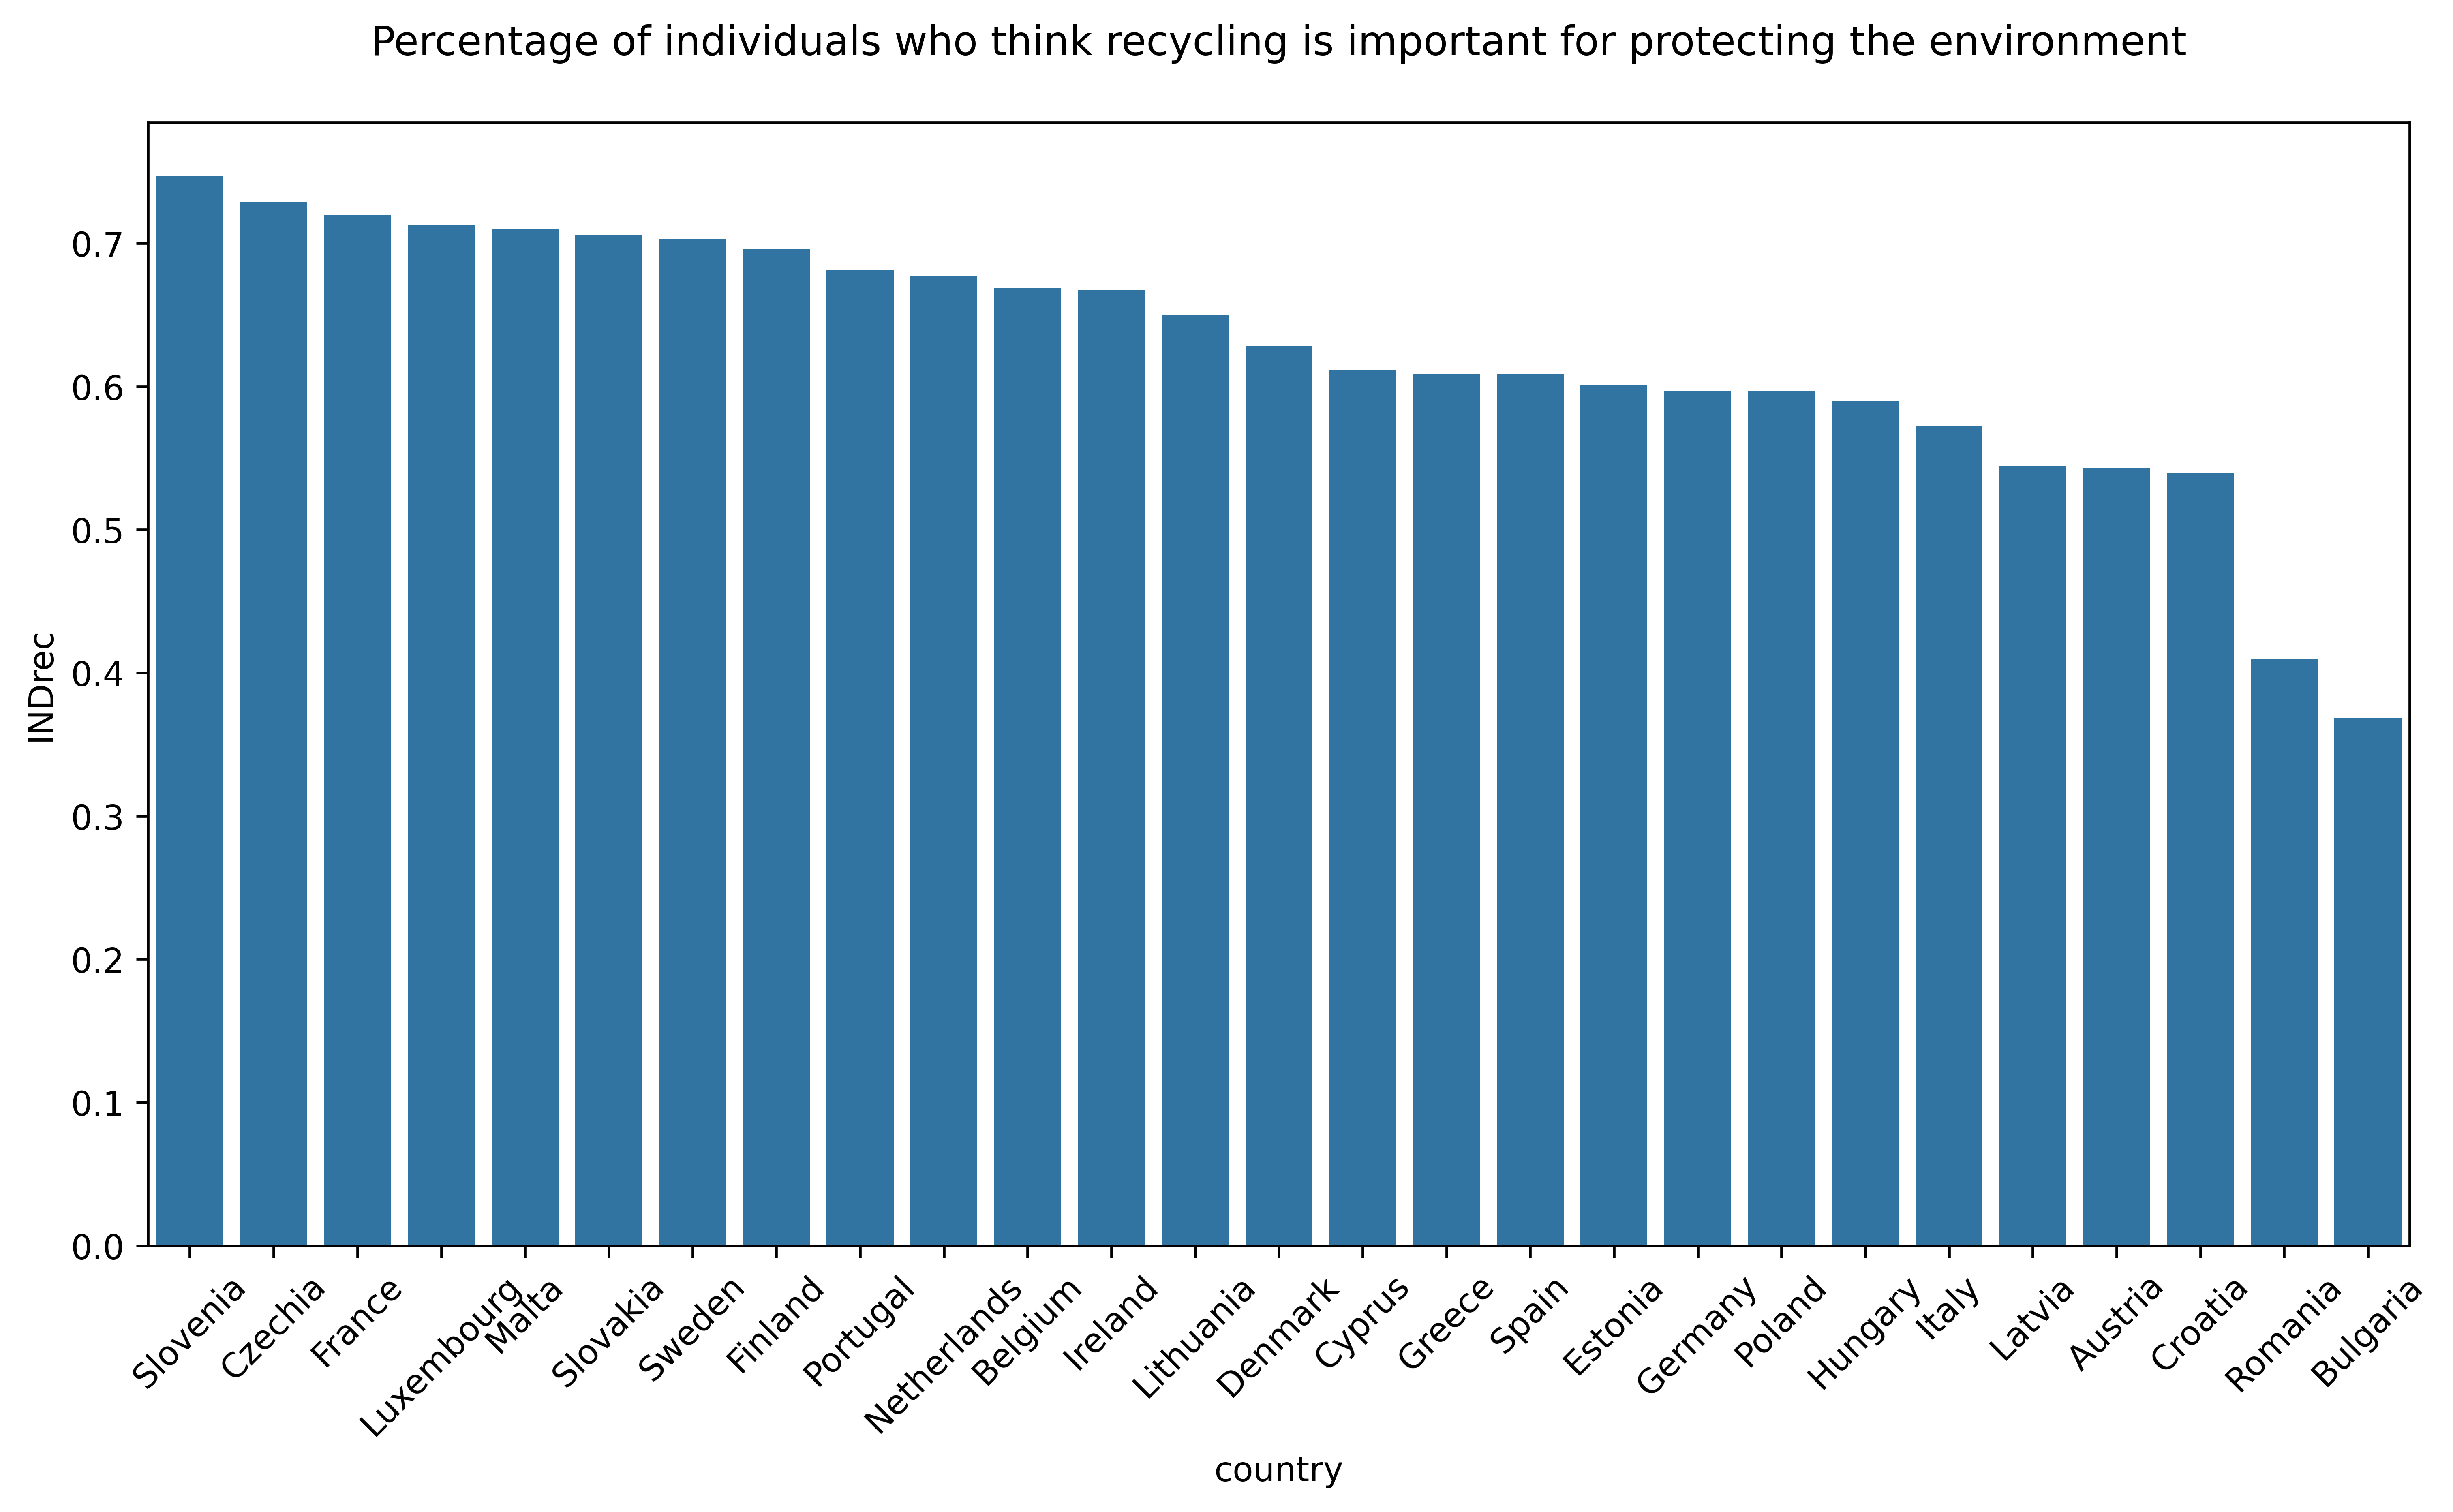

In [55]:
# plot INDrec as a barplot for each country in descending order

#set dpi to 600
plt.rcParams['figure.dpi'] = 600

plt.figure(figsize=(12, 6))
sns.barplot(data=df_ind_avg.sort_values(by='INDrec', ascending=False), x='country', y='INDrec')
plt.xticks(rotation=45)
plt.title('Percentage of individuals who think recycling is important for protecting the environment',
          pad=20)

plt.savefig('INDrec_barplot.png', bbox_inches='tight')

plt.show()

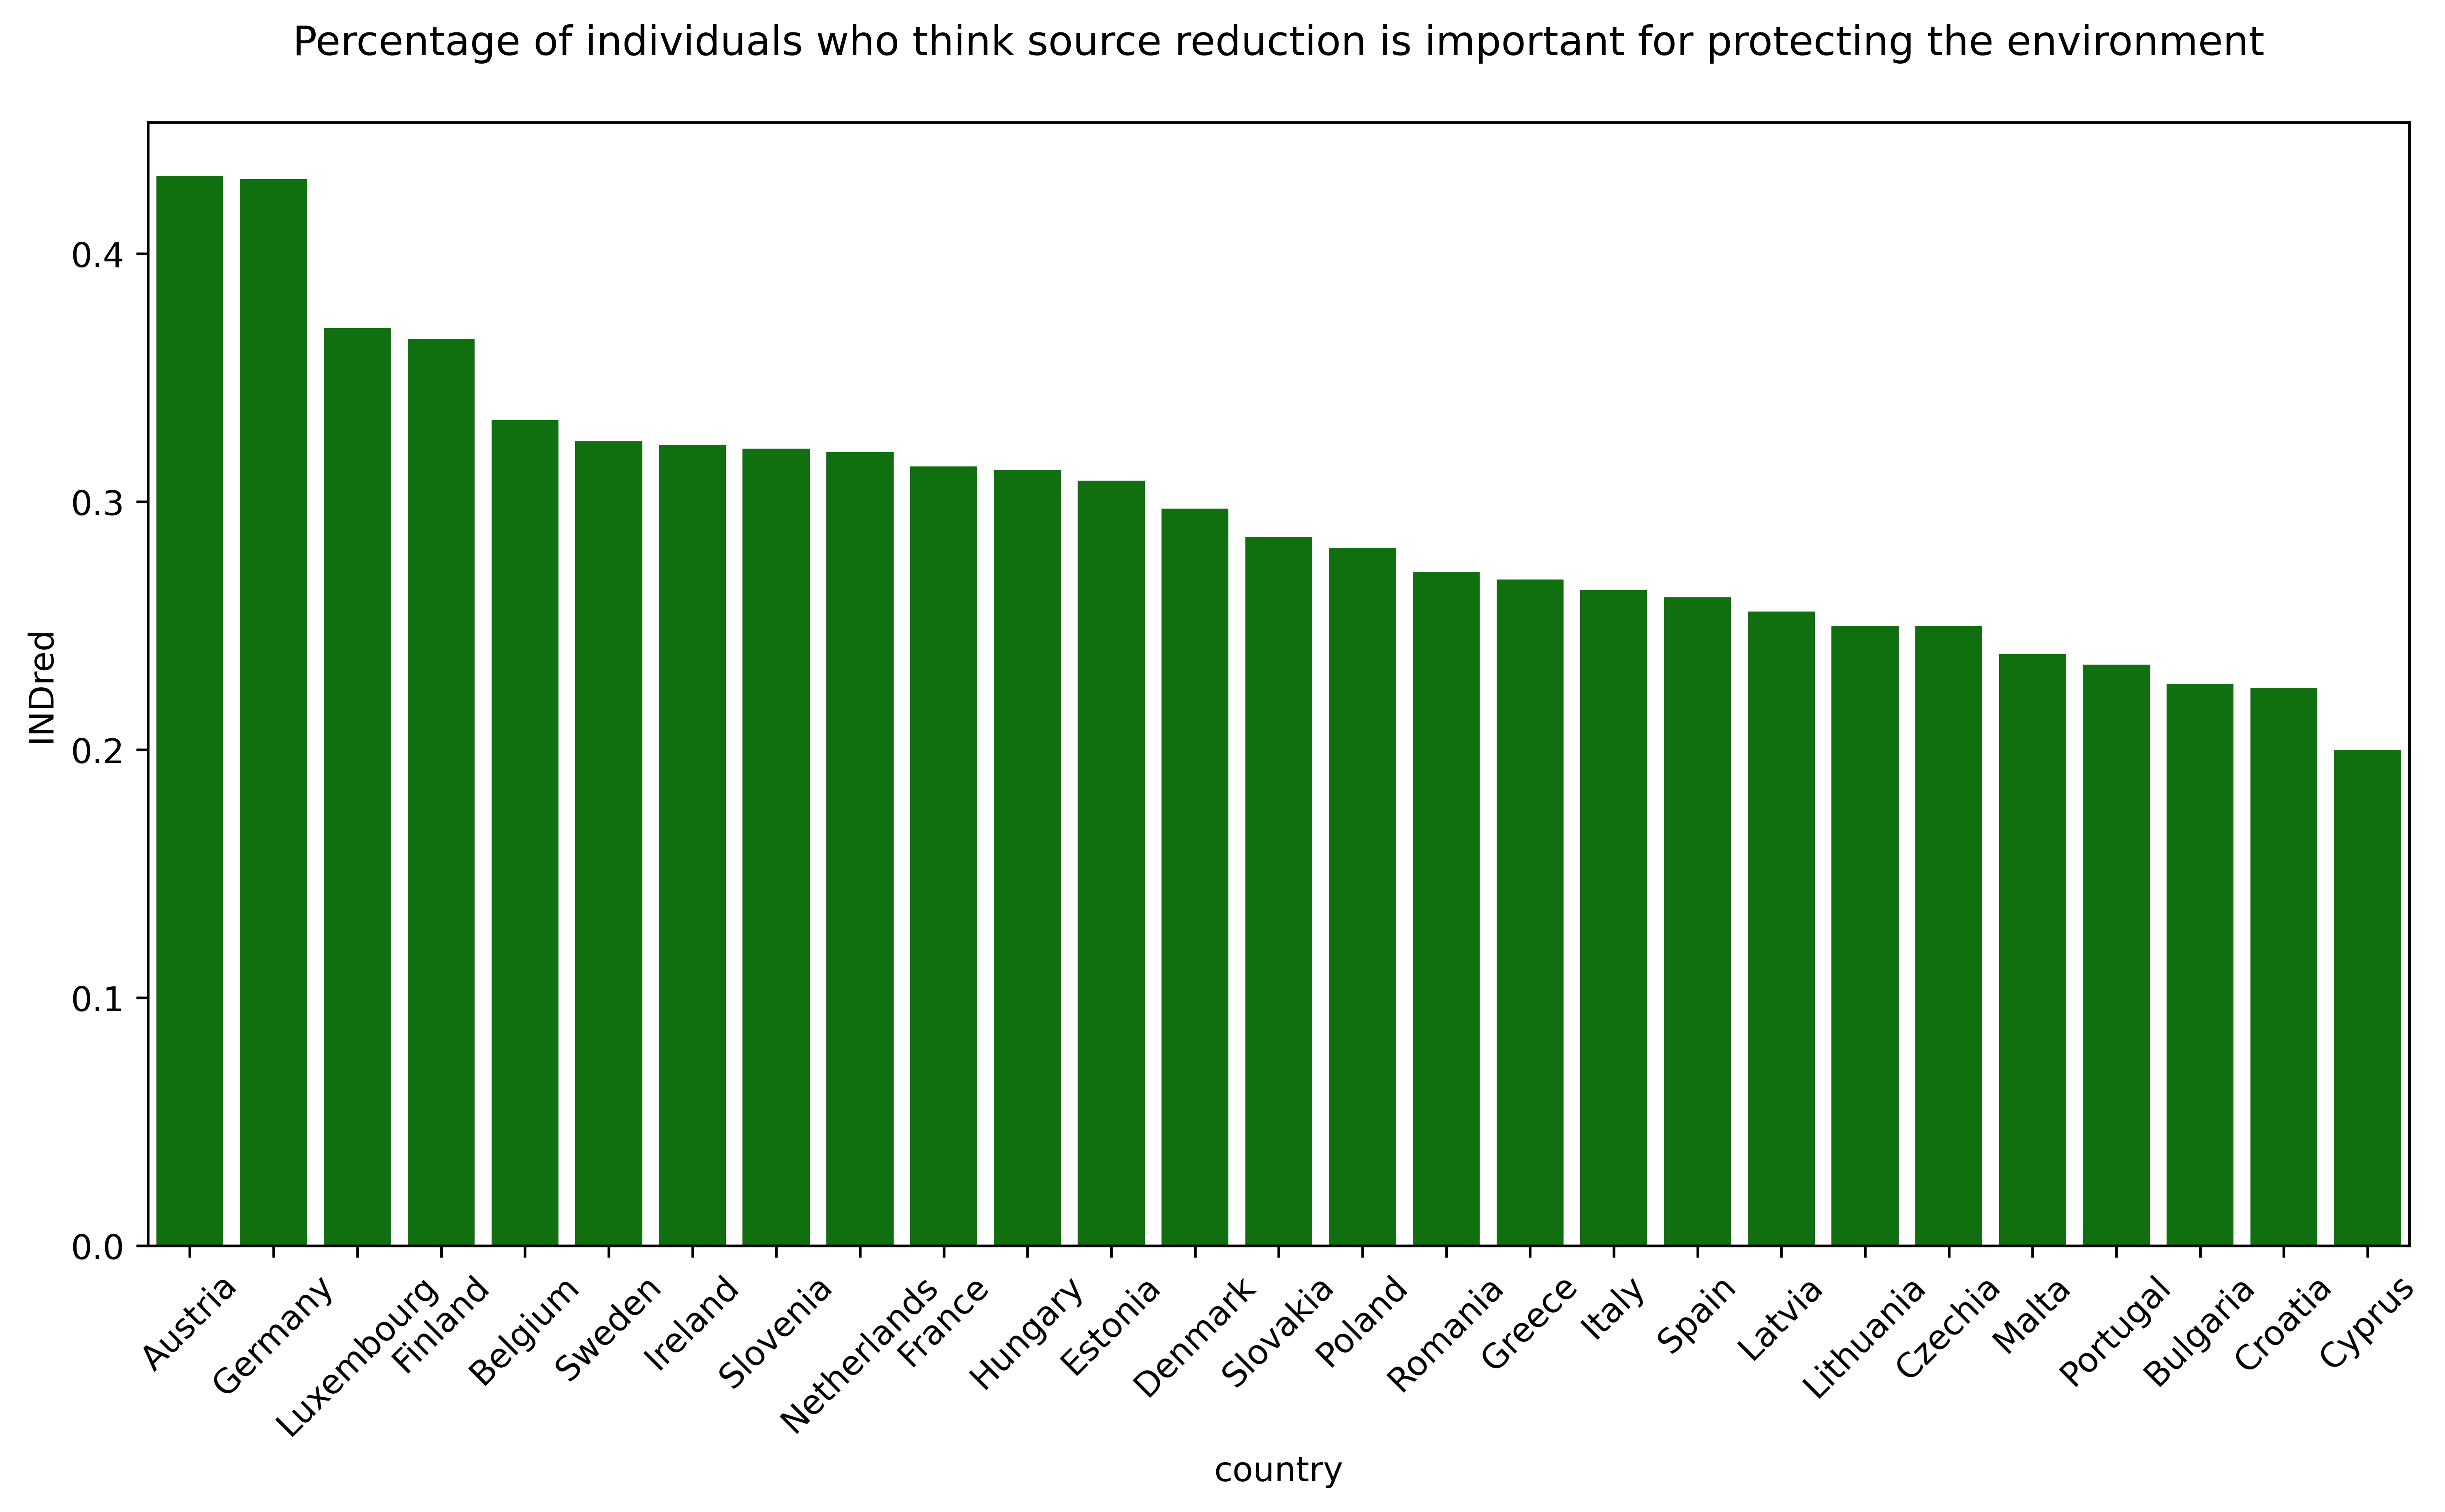

In [56]:
#plot a barplot for INDred for each country in descending order
plt.rcParams['figure.dpi'] = 600

plt.figure(figsize=(12, 6))
sns.barplot(data=df_ind_avg.sort_values(by='INDred', ascending=False), x='country', y='INDred', color='green')
plt.xticks(rotation=45)
plt.title('Percentage of individuals who think source reduction is important for protecting the environment',
          pad=20)

plt.savefig('INDred_barplot.png', bbox_inches='tight', dpi=600)  

plt.show()

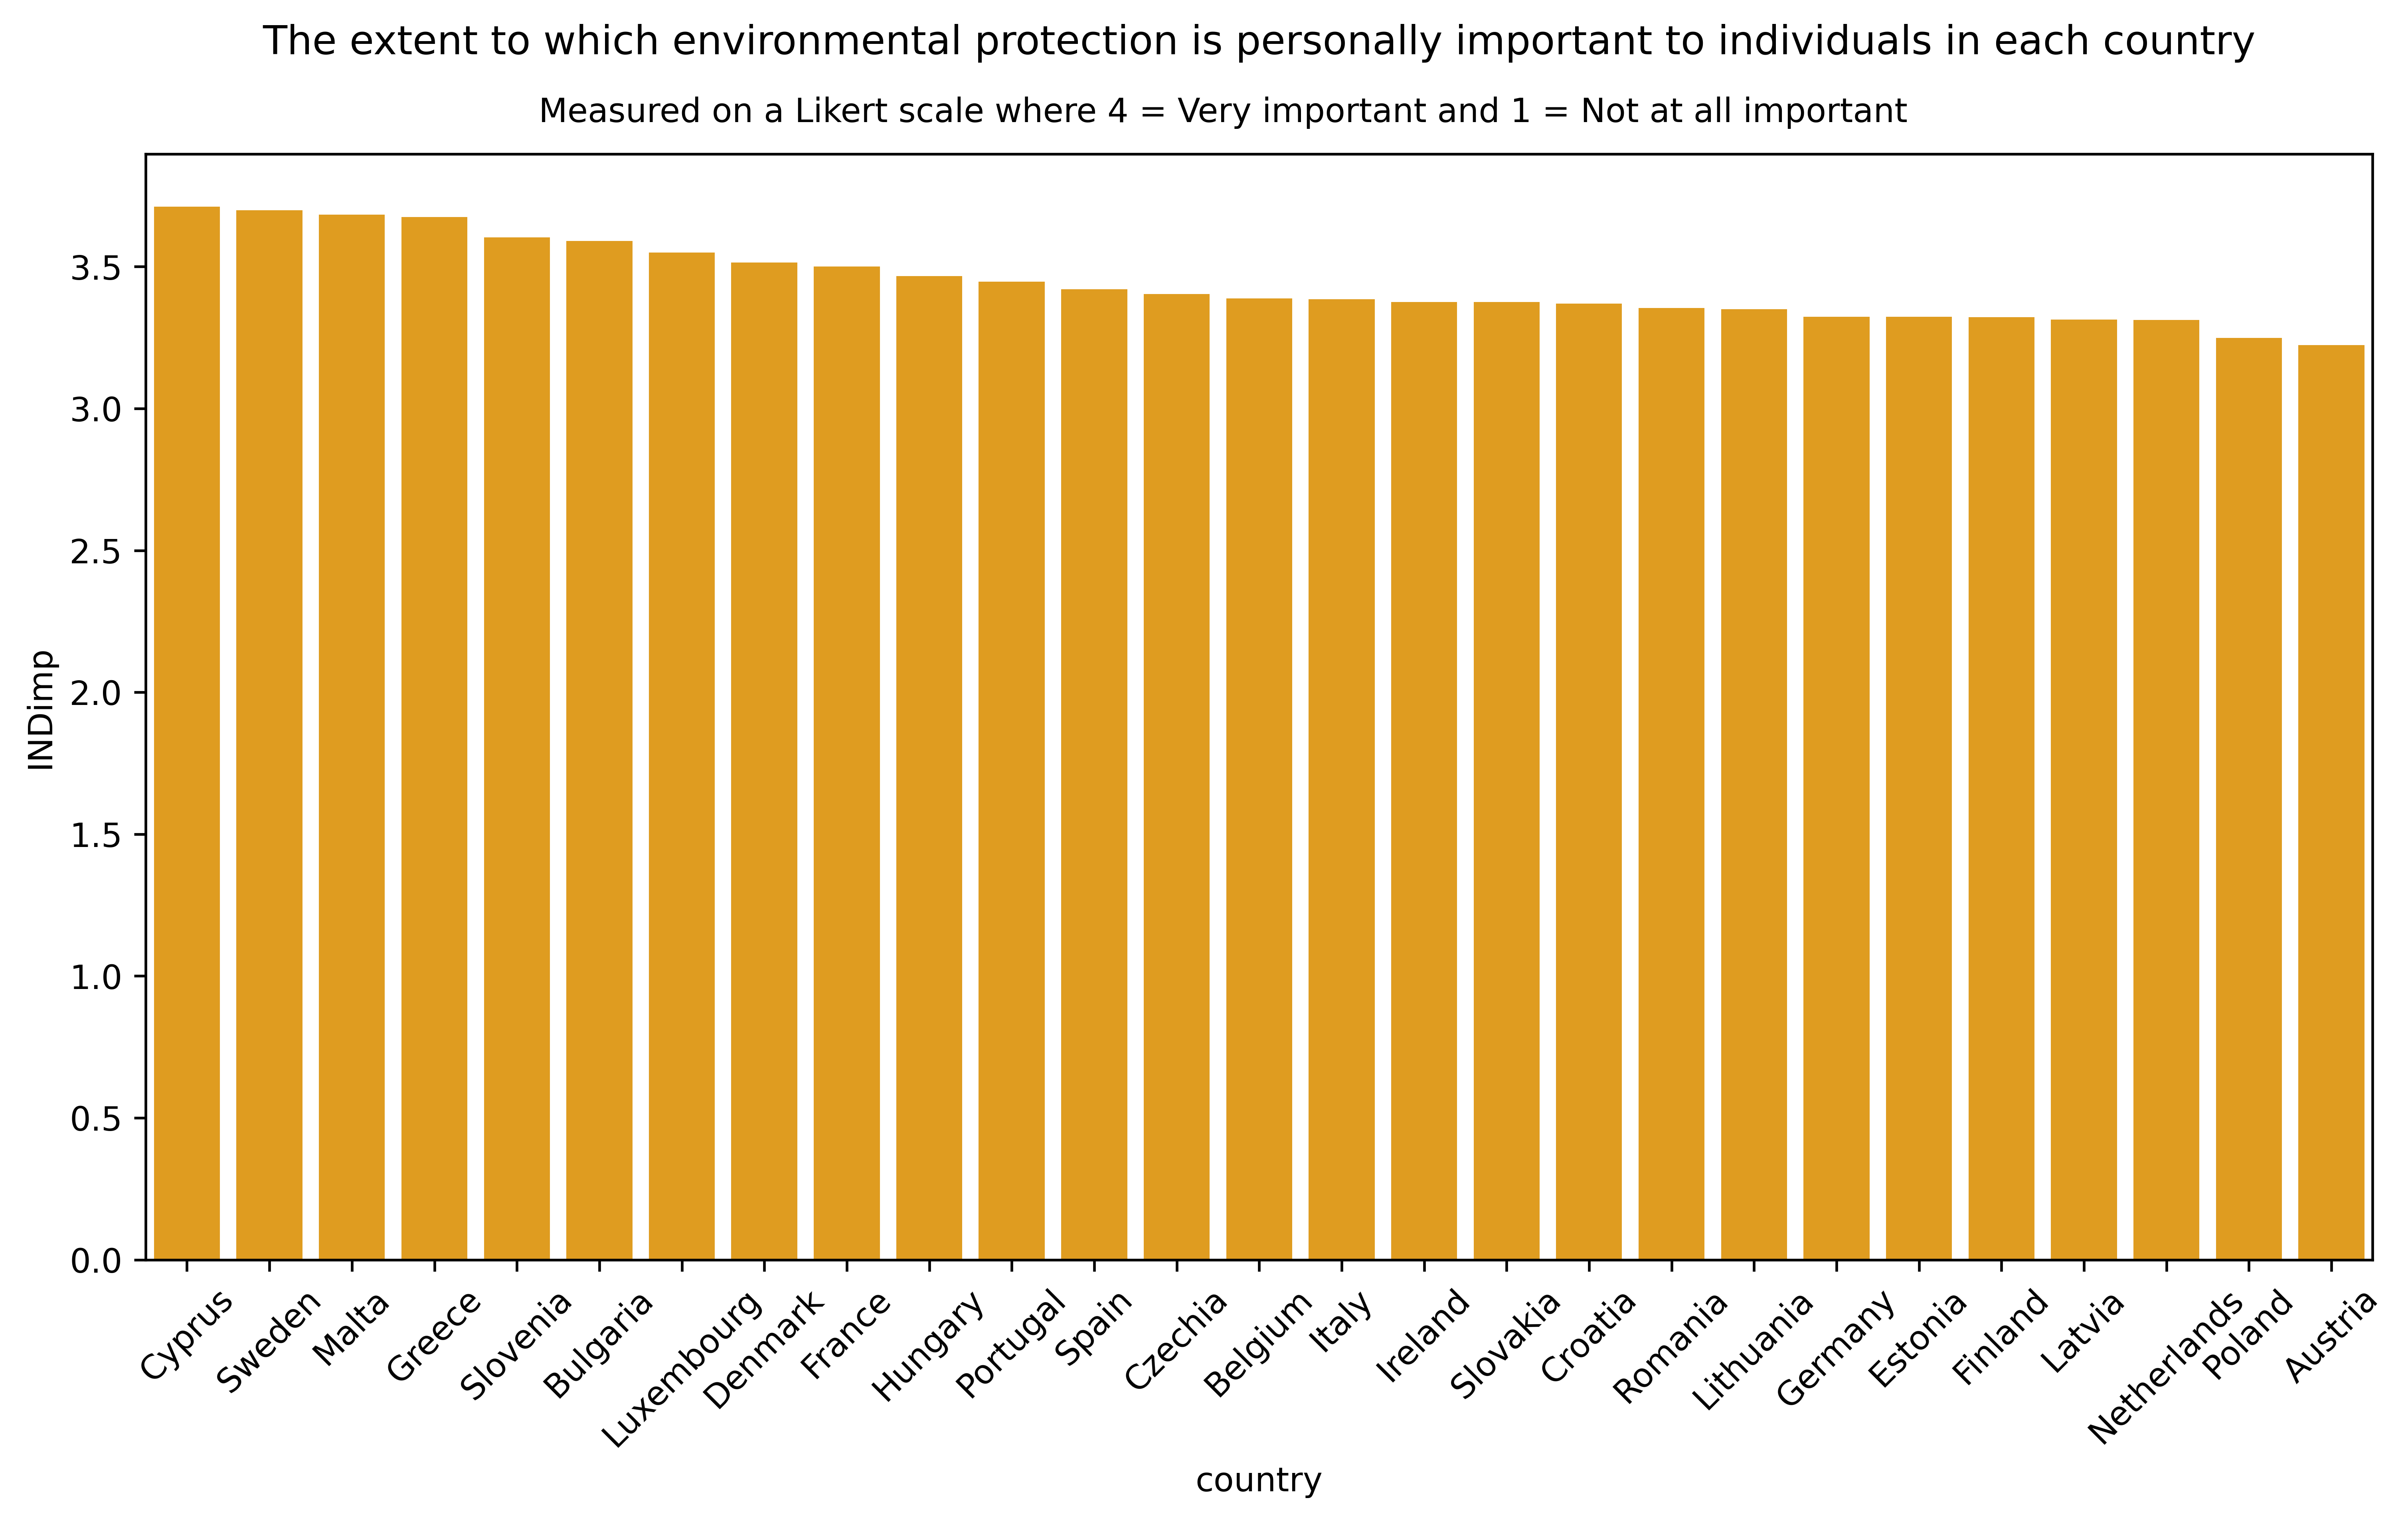

In [57]:
# plot a barplot for INDimp for each country in descending order
plt.rcParams['figure.dpi'] = 600

plt.figure(figsize=(12, 6))
sns.barplot(data=df_ind_avg.sort_values(by='INDimp', ascending=False), x='country', y='INDimp', color='orange')
plt.xticks(rotation=45)
plt.title('The extent to which environmental protection is personally important to individuals in each country',
          pad=30)
#add a subtitle
plt.suptitle('Measured on a Likert scale where 4 = Very important and 1 = Not at all important', 
             y=0.92, fontsize=10)

plt.savefig('INDimp_barplot.png', bbox_inches='tight', dpi=600)

plt.show()

In [20]:
# compute the average of INDrec, INDred, INDimp for each year across all countries
df_ind_year_avg = df_ind.groupby('year').agg({
    'INDrec': 'mean',
    'INDred': 'mean',
    'INDimp': 'mean'
}).reset_index()

print(df_ind_year_avg)

   year    INDrec    INDred    INDimp
0  2004  0.727917  0.307917  2.991250
1  2008  0.562308  0.263077  3.612692
2  2011  0.602692  0.308462  3.557692
3  2014  0.566667  0.200741  3.501111
4  2017  0.618148  0.230000  3.500000
5  2019  0.651481  0.284444  3.453704
6  2024  0.684444  0.482222       NaN


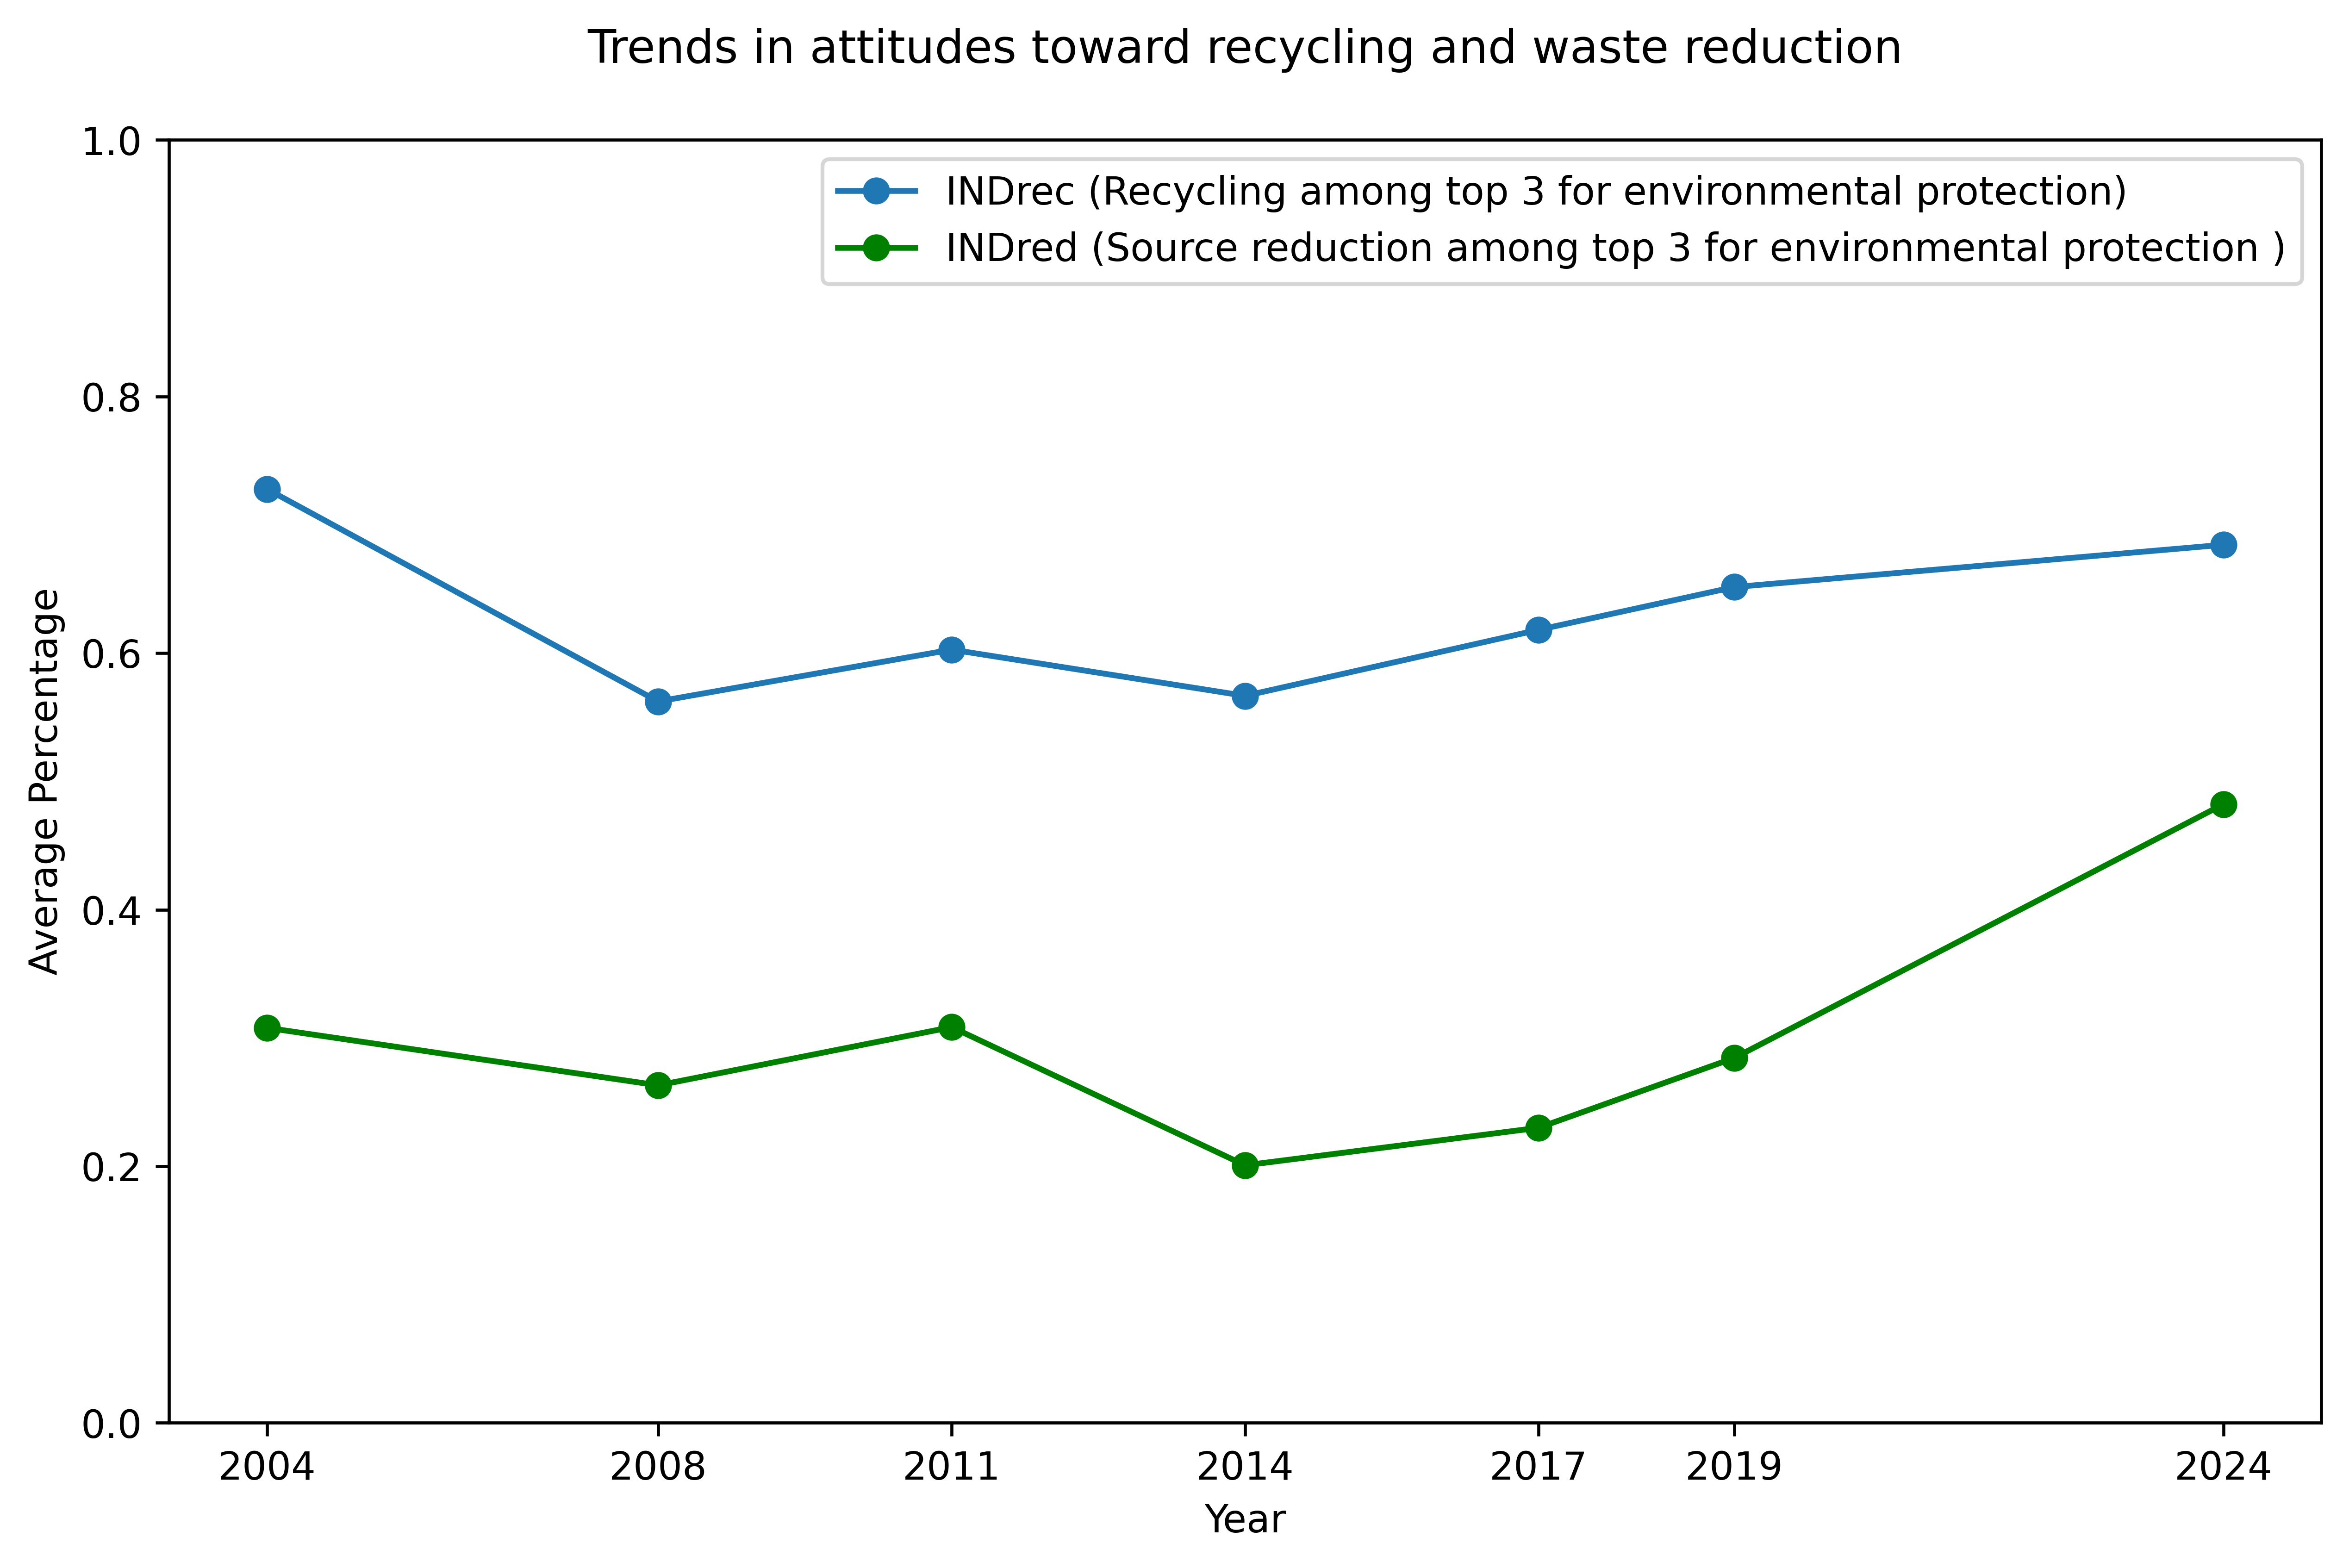

In [26]:
# plot line plots for each variable over the years in one chart
plt.rcParams['figure.dpi'] = 600

plt.figure(figsize=(10, 6))
plt.plot(df_ind_year_avg['year'], df_ind_year_avg['INDrec'], marker='o', 
         label='INDrec (Recycling among top 3 for environmental protection)')
plt.plot(df_ind_year_avg['year'], df_ind_year_avg['INDred'], marker='o', 
         label='INDred (Source reduction among top 3 for environmental protection )', color='green')
plt.xticks(df_ind_year_avg['year'])

# make y axis start from 0 to 1
plt.ylim(0, 1)

plt.title('Trends in attitudes toward recycling and waste reduction', pad=20)
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.legend()

plt.savefig('INDrec_INDred_trend.png', bbox_inches='tight', dpi=600)
plt.show()

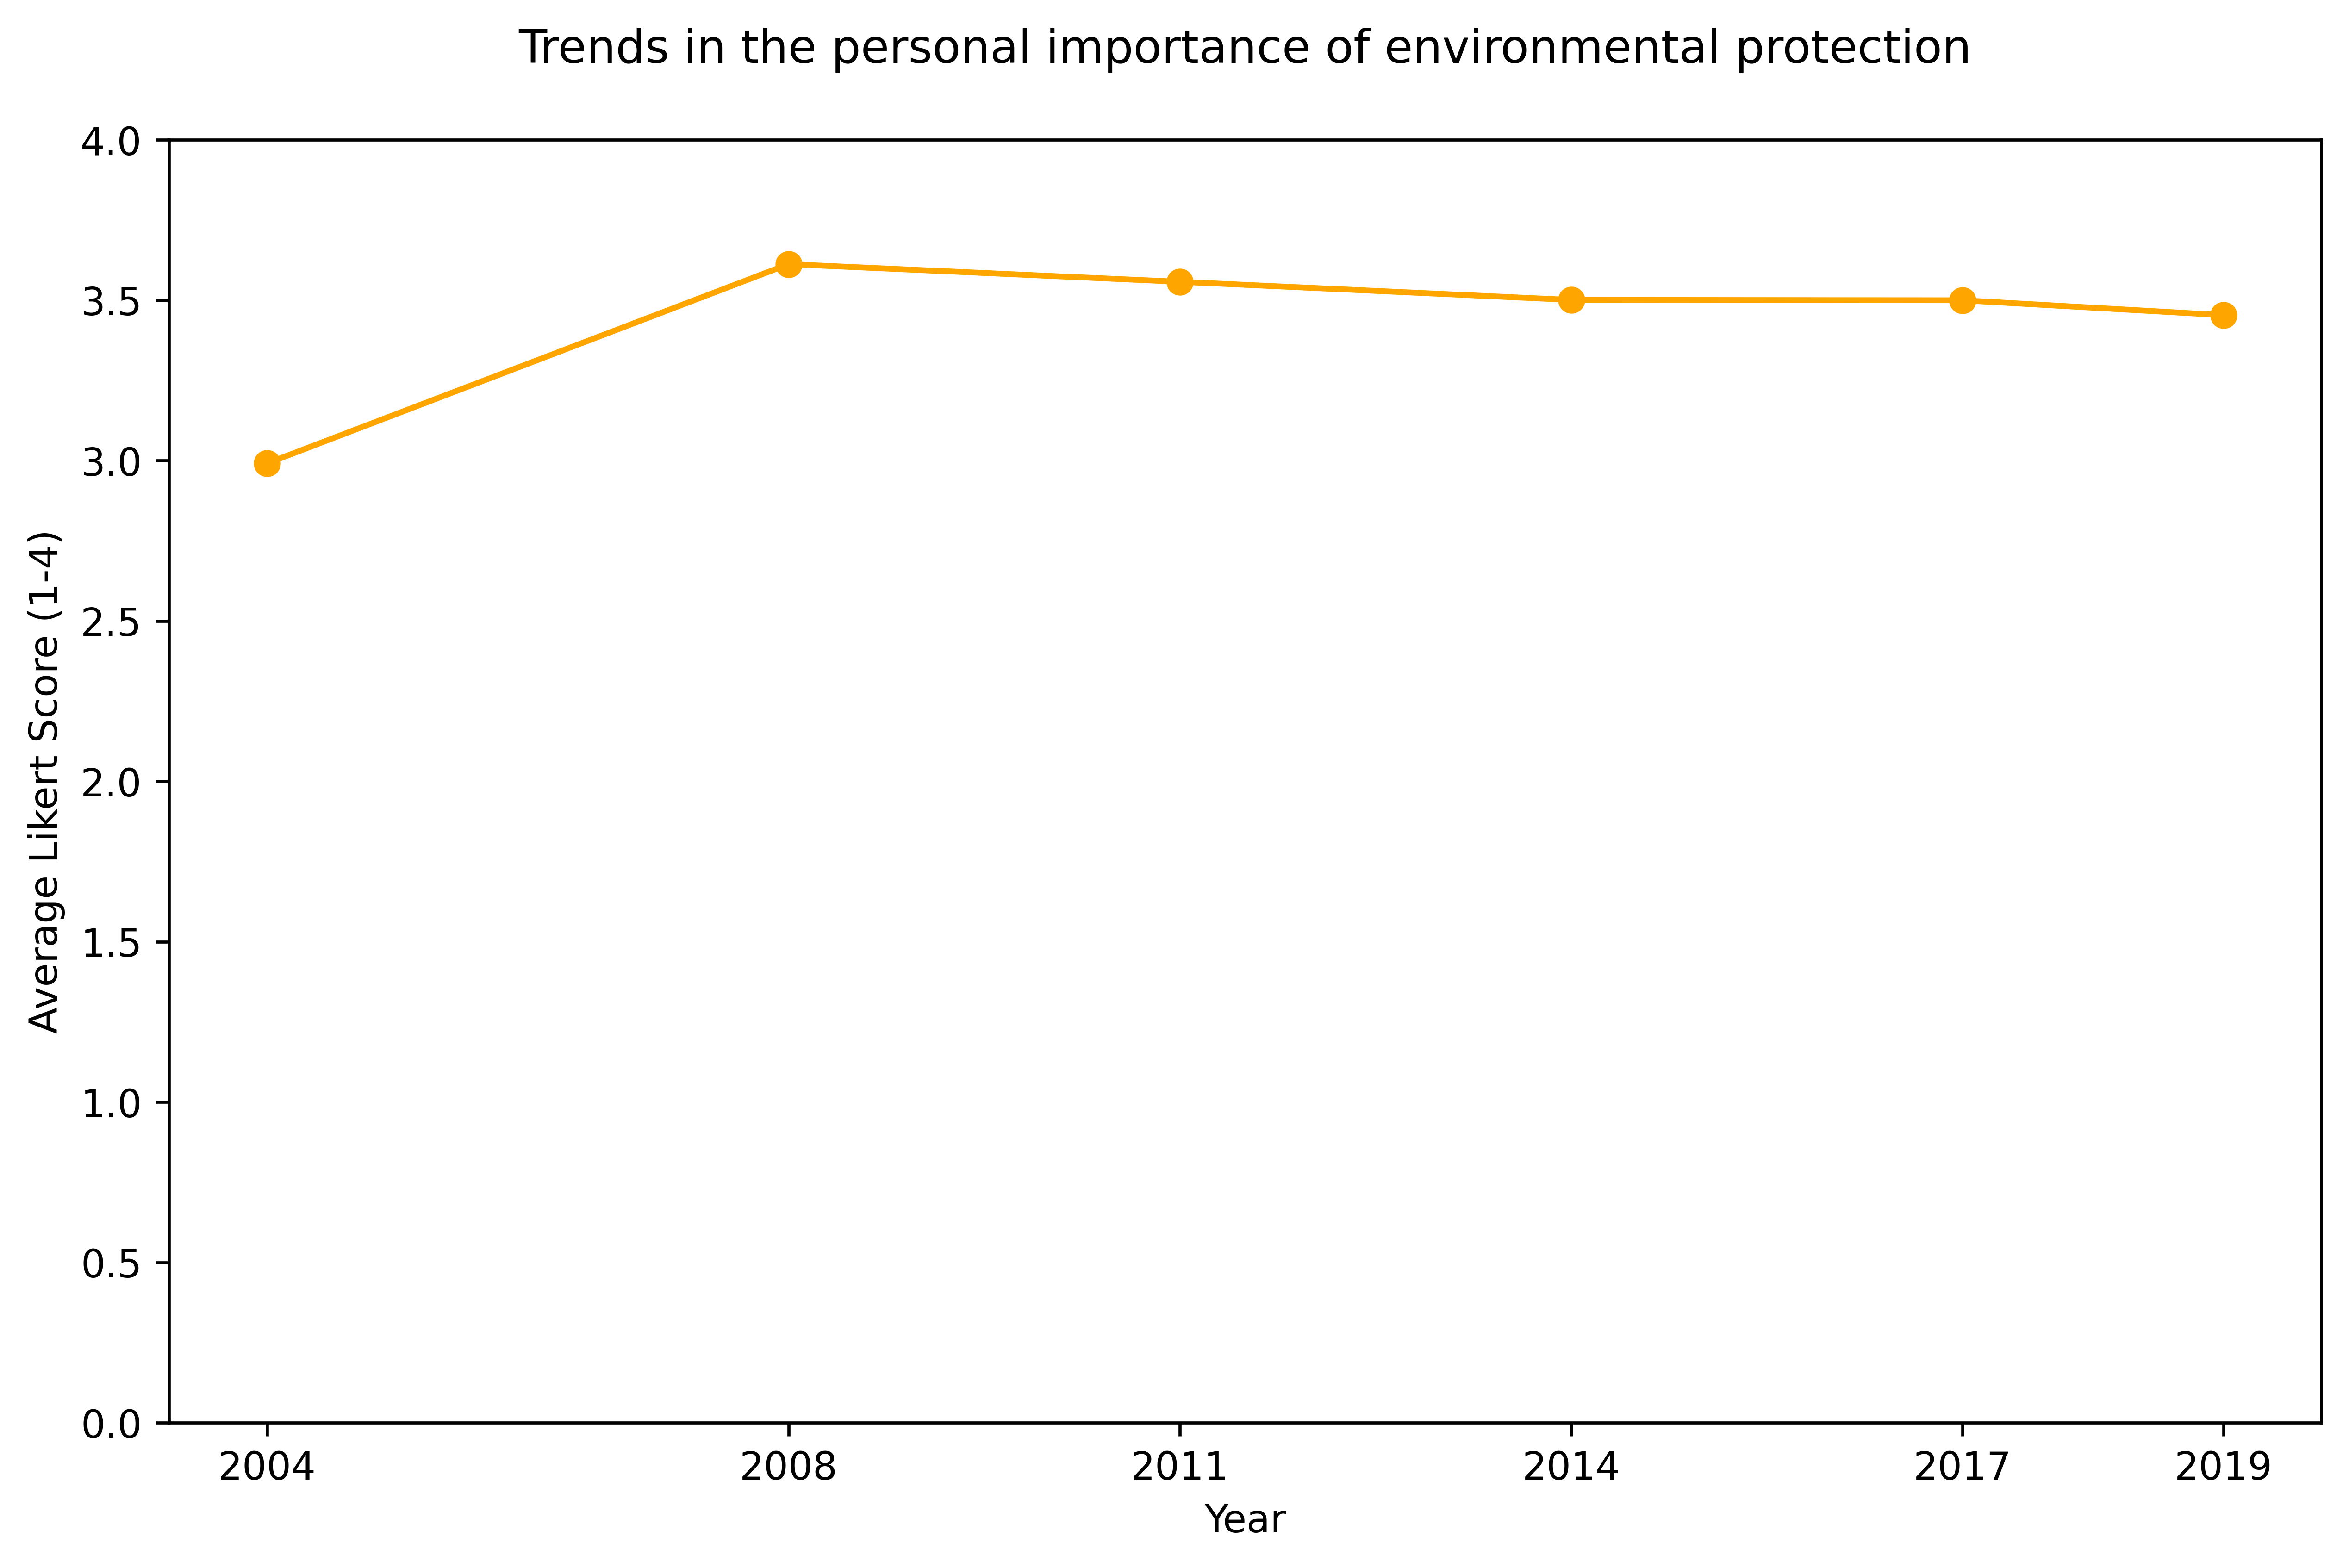

In [38]:
# plot a line plot for INDimp over the years
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(10, 6))

#drop the rows where INDimp is null
df_ind_year_avg = df_ind_year_avg.dropna(subset=['INDimp'])

plt.plot(df_ind_year_avg['year'], df_ind_year_avg['INDimp'], marker='o', color='orange')
plt.ylim(0, 4)
plt.xticks(df_ind_year_avg['year'])
plt.xlabel('Year')
plt.ylabel('Average Likert Score (1-4)')
plt.title('Trends in the personal importance of environmental protection', pad=20)

plt.savefig('INDimp_trend.png', bbox_inches='tight', dpi=600)

In [33]:
# statistical skewness and kurtosis
from scipy.stats import skew, kurtosis #default is Fisher's definition of kurtosis

dist_summary_ind = {}

df_ind_var = df_ind[['INDrec', 'INDred', 'INDimp']]

for col in df_ind_var.columns:
        dist_summary_ind[col] = {
            'skew': skew(df_ind[col].dropna()),
            'kurtosis': kurtosis(df_ind[col].dropna())
        }

dist_summary_ind = pd.DataFrame(dist_summary_ind).T
dist_summary_ind

# ---skew < abs(0.5): no transformation needed---#
# ---abs(0.5) < skew < abs(1.0): mild skew, consider transformation if important ---#
# --- abs(1) < skew: strong skew, recommend transformation

# --- kurtosis < abs(1): close to normal
# --- abs(1) < kurtosis < abs(2): moderate tails
# --- abs(2) < kurtosis: heavy tails, outliers likely

,skew,kurtosis
INDrec,-0.340394,0.713795
INDred,1.228936,2.205396
INDimp,-0.874608,0.934471


In [ ]:
#save df_ind as panel data to a csv file
#df_ind.set_index(['country', 'year'], inplace=True)
#df_ind.to_csv('df_ind.csv')